In [31]:
import pandas as pd


In [32]:
df = pd.read_csv("fct_invoice.csv")

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [33]:
jsondf = pd.read_json("dim_customer.json")

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


# Easy

1. How many unique customers are in the dataset?

In [34]:
df['customer_id'].nunique()

5191

2. What are the different categories of products available? How many unique categories are there?

In [35]:
categories = df['category'].unique()

print(categories)
len(categories)

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


8

3. Which payment method is the most popular? How many times was it used?

In [36]:
print(df['payment_method'].value_counts())
print("The most popular payment method is cash.")
print("It was used 44,447 times.")



Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64
The most popular payment method is cash.
It was used 44,447 times.


# Medium

1. What are the three most popular categories, by total sales?

In [37]:
df['revenue'] = df['quantity'] * df['price']

newdf = df.copy()


revenue_per_category = newdf.groupby('category')['revenue'].sum()

sorted_revenue_per_category = revenue_per_category.sort_values(ascending = False)

sorted_revenue_per_category.head(3)



category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: revenue, dtype: float64

2. What are the total sales attributed to customers over the age of 45?

In [38]:
newdf.rename(columns = {'customer_id':'id'}, inplace = True)
merged = pd.merge(newdf, jsondf, on = 'id', how = 'left')
merged

merged.loc[merged['age'] > 45.0, 'revenue'].sum()

82039768.15

3.How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

C:\Users\Kino Dela Cruz\AppData\Local\Temp\ipykernel_19516\4285860511.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['invoice_date'] = pd.to_datetime(df['invoice_date'])


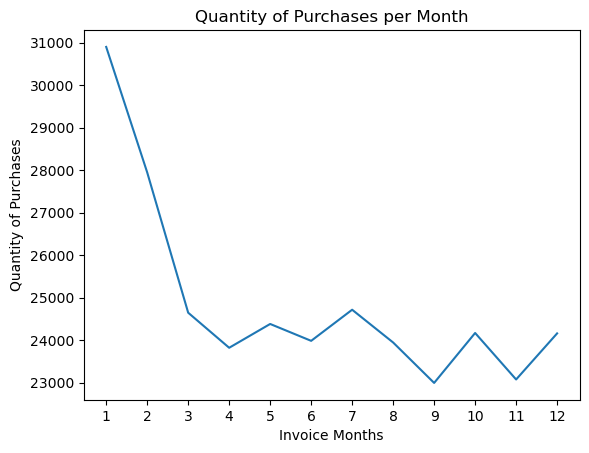

In [39]:
import matplotlib.pyplot as plt

#monthly trends

df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['month'] = df['invoice_date'].dt.month


grouped_df_monthly = df.groupby('month')['quantity'].sum().reset_index()
plt.plot(grouped_df_monthly['month'], grouped_df_monthly['quantity'])
plt.xlabel('Invoice Months')
plt.ylabel('Quantity of Purchases')
plt.title('Quantity of Purchases per Month')
plt.xticks(range(1,12+1))
plt.show()






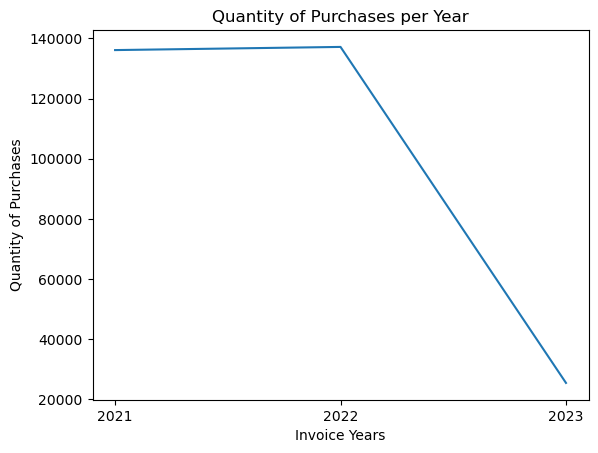

In [74]:
#yearly

df['year'] = df['invoice_date'].dt.year
grouped_df_yearly = df.groupby('year')['quantity'].sum().reset_index()
plt.plot(grouped_df_yearly['year'], grouped_df_yearly['quantity'])
plt.xlabel('Invoice Years')
plt.ylabel('Quantity of Purchases')
plt.title('Quantity of Purchases per Year')
plt.xticks([2021, 2022, 2023])
plt.show()



# Hard

1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [58]:
#category

pivot_table1 = merged.pivot_table(values='revenue', index='category', aggfunc='sum')
pivot_table1

,revenue
category,
Books,8.345529e+05
Clothing,1.139968e+08
Cosmetics,6.792863e+06
Food & Beverage,8.495351e+05
Shoes,6.655345e+07
Souvenir,6.358247e+05
Technology,5.786235e+07
Toys,3.980426e+06


In [73]:
#decade age range

merged['decadeAgeRange'] = (merged['age'] // 10) * 10
merged['decadeAgeRange'].dropna()
merged['decadeAgeRange'] = merged['decadeAgeRange'].replace([10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0], ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89'])
pivot_table2 = merged.pivot_table(values='revenue', index='decadeAgeRange', aggfunc='sum')
pivot_table2

,revenue
decadeAgeRange,
10-19,4259300.00
20-29,22636074.19
30-39,26093876.40
40-49,25494420.27
50-59,21745088.64
60-69,23341509.90
70-79,16728769.75
80-89,9559321.99


In [70]:
#category and decade age range combined

merged['decadeAgeRange'] = (merged['age'] // 10) * 10
merged['decadeAgeRange'].dropna()
merged['decadeAgeRange'] = merged['decadeAgeRange'].replace([10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0], ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89'])
pivot_table3 = merged.pivot_table(index='category', columns='decadeAgeRange', values='revenue', aggfunc = "sum")
pivot_table3



decadeAgeRange,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
